# Data Ingestion

### csv.Datei hochladen und Daten bearbeiten

In [2]:
# Libraries
import os
import re
import time
import fnmatch
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Get current working directory
print(os.getcwd())

/workspaces/python_data_preparation


In [3]:
# dataimport:
df_raw = pd.read_csv('./Data/incomplete_dataset.csv', sep=';', encoding='utf-8')
df_raw.head()

#datapreparation:
print(df_raw.isnull().sum())
df = df_raw.dropna()
print(df.isnull().sum())

ID        0
Name      2
Age       4
City      3
Income    3
Status    2
dtype: int64
ID        0
Name      0
Age       0
City      0
Income    0
Status    0
dtype: int64


In [4]:
df.head(7)

,ID,Name,Age,City,Income,Status
0,1,Anna,23.0,New York,54000.0,Single
1,2,Ben,35.0,Los Angeles,58000.0,Married
6,7,Fiona,22.0,New York,48000.0,Single
10,11,Jack,36.0,Miami,59000.0,Married
11,12,Kate,19.0,New York,57000.0,Single
15,16,Nora,33.0,New York,60000.0,Divorced
18,19,Quinn,27.0,Chicago,47000.0,Married


In [5]:
df.columns = df.columns.str.lower()
print(df.head(7))
print()
print(df.dtypes)

    id   name   age         city   income    status
0    1   Anna  23.0     New York  54000.0    Single
1    2    Ben  35.0  Los Angeles  58000.0   Married
6    7  Fiona  22.0     New York  48000.0    Single
10  11   Jack  36.0        Miami  59000.0   Married
11  12   Kate  19.0     New York  57000.0    Single
15  16   Nora  33.0     New York  60000.0  Divorced
18  19  Quinn  27.0      Chicago  47000.0   Married

id          int64
name       object
age       float64
city       object
income    float64
status     object
dtype: object


In [7]:
df['age'] = df['age'].astype(int)
print(df.dtypes)
print()
print(df.sum())
print()
print(df.head(7))

id          int64
name       object
age         int64
city       object
income    float64
status     object
dtype: object

id                                                       68
name                          AnnaBenFionaJackKateNoraQuinn
age                                                     195
city      New YorkLos AngelesNew YorkMiamiNew YorkNew Yo...
income                                             383000.0
status      SingleMarriedSingleMarriedSingleDivorcedMarried
dtype: object

    id   name  age         city   income    status
0    1   Anna   23     New York  54000.0    Single
1    2    Ben   35  Los Angeles  58000.0   Married
6    7  Fiona   22     New York  48000.0    Single
10  11   Jack   36        Miami  59000.0   Married
11  12   Kate   19     New York  57000.0    Single
15  16   Nora   33     New York  60000.0  Divorced
18  19  Quinn   27      Chicago  47000.0   Married


In [26]:
df = df.sort_values(by=['status'], 
                ascending=False)
df.head(7)

# Hier sage ich, was für eine Reihenfolge die Spalten haben 
df[['id',
     'name',
     'age',
     'city',
     'income',
     'status']].head(7)

,id,name,age,city,income,status
0,1,Anna,23,New York,54000.0,Single
6,7,Fiona,22,New York,48000.0,Single
11,12,Kate,19,New York,57000.0,Single
1,2,Ben,35,Los Angeles,58000.0,Married
10,11,Jack,36,Miami,59000.0,Married
18,19,Quinn,27,Chicago,47000.0,Married
15,16,Nora,33,New York,60000.0,Divorced


In [ ]:
pivot_table = pd.pivot_table(df[['age', 'income', 'status']], index=['status'], values={'income': np.mean, 'age': np.mean}).round(1)                    # round(2) rundet die Werte auf zwei Dezimalstellen

# Format the values to 2 decimal places with trailing zeros
pivot_table = pivot_table.applymap(lambda x: f"{x:.2f}" if isinstance(x, (int, float)) else x)

        # lambda x: f"{x:.2f}"                  -> formatiert numerische Werte als String mit genau zwei Dezimalstellen und nachfolgenden Nullen (z.b. 123.40)
        # if isinstance(x, (int, float))        -> überprüft, ob das Element ein numerischer Typ ist, bevor es formatiert wird.

# Display the pivot table
pivot_table

   

,age,income
status,,
Divorced,33.00,60000.00
Married,32.70,54666.70
Single,21.30,53000.00


In [22]:
pivot_table = pd.pivot_table(df, index=['status'], values={'income': np.mean}).round(1)                    # round(2) rundet die Werte auf zwei Dezimalstellen

# Format the values to 2 decimal places with trailing zeros
pivot_table = pivot_table.applymap(lambda x: f"{x:.2f}" if isinstance(x, (int, float)) else x)

        # lambda x: f"{x:.2f}"                  -> formatiert numerische Werte als String mit genau zwei Dezimalstellen und nachfolgenden Nullen (z.b. 123.40)
        # if isinstance(x, (int, float))        -> überprüft, ob das Element ein numerischer Typ ist, bevor es formatiert wird.

# Display the pivot table
pivot_table


,income
status,
Divorced,60000.00
Married,54666.70
Single,53000.00


### Data ingestion - .json-Datei verwenden und Daten bearbeiten

In [68]:
# Libraries
import os
import re
import pytz
import json
#import folium
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

from datetime import date
from datetime import time

from zipfile import ZipFile
from bs4 import BeautifulSoup

#from PyPDF2 import PdfReader

#from reportlab.lib.units import inch
#from reportlab.lib.colors import blue
#from reportlab.lib.pagesizes import LETTER
#from reportlab.pdfgen.canvas import Canvas

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

/workspaces/python_data_preparation


In [69]:
# Read data
with open('./Data/incomplete_dataset.json', 'r') as f:
    data_raw = json.load(f)
print(data_raw)

# Read data to a data frame using the pandas library
data_raw = pd.read_json("./Data/incomplete_dataset.json")

# Print the data
print(data_raw)
print(data_raw.shape)

[{'ID': 1, 'Name': 'George', 'Age': 25.0, 'City': 'Miami', 'Income': 75000.0, 'Status': 'Married'}, {'ID': 2, 'Name': 'Tom', 'Age': 50.0, 'City': 'Chicago', 'Income': None, 'Status': 'Married'}, {'ID': 3, 'Name': 'Oscar', 'Age': 40.0, 'City': 'Miami', 'Income': 55000.0, 'Status': 'Married'}, {'ID': 4, 'Name': 'Kate', 'Age': 25.0, 'City': 'Chicago', 'Income': 55000.0, 'Status': 'Married'}, {'ID': 5, 'Name': 'Hannah', 'Age': None, 'City': 'Los Angeles', 'Income': 65000.0, 'Status': 'Single'}, {'ID': 6, 'Name': 'George', 'Age': 25.0, 'City': 'Chicago', 'Income': 60000.0, 'Status': 'nan'}, {'ID': 7, 'Name': 'Sophie', 'Age': 35.0, 'City': 'Chicago', 'Income': 65000.0, 'Status': 'Married'}, {'ID': 8, 'Name': 'Kate', 'Age': 25.0, 'City': 'Miami', 'Income': 60000.0, 'Status': 'Married'}, {'ID': 9, 'Name': 'Kate', 'Age': None, 'City': 'Miami', 'Income': 65000.0, 'Status': 'Divorced'}, {'ID': 10, 'Name': 'Diana', 'Age': 35.0, 'City': 'New York', 'Income': 50000.0, 'Status': 'Married'}, {'ID': 11

In [70]:
print("Missing values before removing: ", data_raw.isnull().sum().sum())
df = data_raw.dropna()
print("Missing values after removing: ", df.isnull().sum().sum())
print(df.shape)
print()
print(df.head(5))
print()
print(df.dtypes)


Missing values before removing:  29
Missing values after removing:  0
(74, 6)

   ID    Name   Age     City   Income   Status
0   1  George  25.0    Miami  75000.0  Married
2   3   Oscar  40.0    Miami  55000.0  Married
3   4    Kate  25.0  Chicago  55000.0  Married
5   6  George  25.0  Chicago  60000.0      nan
6   7  Sophie  35.0  Chicago  65000.0  Married

ID          int64
Name       object
Age       float64
City       object
Income    float64
Status     object
dtype: object


#### NaN-Werte entfernen   |   Kleinbuchstaben generieren | Index Reseten | duplicate entfernen

In [76]:
data_raw = data_raw.applymap(lambda x: x.strip() if isinstance(x, str) else x)      # falls leerzeichen drin sind
data_raw.replace(['N/A', 'None', '-', 'nan'], np.nan, inplace=True)                 # falls NaN-Inhalte als String abgespeichert sind
print("Missing values before removing: ", data_raw.isnull().sum().sum())
print(data_raw.shape)
df = data_raw.dropna()
df = df.drop_duplicates()       # Standardmäßig entfernt die Methode alle Zeilen, die in ihrem gesamten Inhalt identisch mit anderen Zeilen sind.
df.columns = df.columns.str.lower() 
print("Missing values after removing: ", df.isnull().sum().sum())
print(df.shape)
df = df.reset_index(drop=True)
df.head(7)


Missing values before removing:  72
(100, 6)
Missing values after removing:  0
(45, 6)


,id,name,age,city,income,status
0,1,George,25.0,Miami,75000.0,Married
1,3,Oscar,40.0,Miami,55000.0,Married
2,4,Kate,25.0,Chicago,55000.0,Married
3,7,Sophie,35.0,Chicago,65000.0,Married
4,8,Kate,25.0,Miami,60000.0,Married
5,10,Diana,35.0,New York,50000.0,Married
6,11,Hannah,60.0,New York,55000.0,Divorced


## Plots darstellen

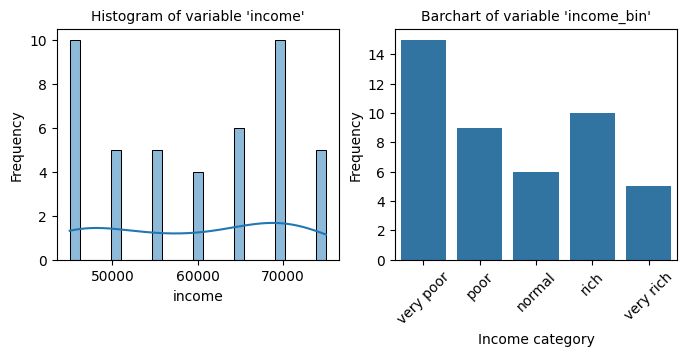

,income,income_bin
0,75000.0,very rich
1,55000.0,poor
2,55000.0,poor
3,65000.0,normal
4,60000.0,poor


In [81]:
# Discretization of the variable 'price_per_hp' into 5 bins (note the 'qcut' function)
df['income_bin'] = pd.qcut(df['income'], 
                                 q=6,  # number of quantiles
                                 labels=['very poor', 
                                         'poor', 
                                         'normal', 
                                         'rich', 
                                         'very rich'],
                                duplicates='drop')

# Show histogram of price_per_hp and barchart of variable 'price_per_hp_bin'
plt.figure(figsize=(8, 3))

# Create a 1x2 grid
plt.subplot(1, 2, 1)
sns.histplot(df['income'], bins=25, kde=True)
plt.title("Histogram of variable 'income'", fontsize=10)
plt.xlabel('income')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='income_bin', orient='v')
plt.title("Barchart of variable 'income_bin'", fontsize=10)
plt.xlabel('Income category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Display variables 'price_per_hp' and 'price_per_hp_bin'
df[['income', 'income_bin']].head()


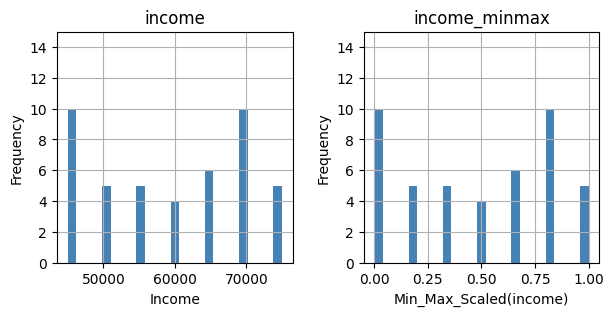

In [85]:
# Min-Max scaling of the variable 'mileage'
df['income_minmax'] = (df['income'] - df['income'].min()) / (df['income'].max() - df['income'].min())

# Histogram of the variable 'area' and 'area_scaled'
ax = df[['income', 'income_minmax']].hist(bins=25, 
                                      figsize=(7, 3), 
                                      color='steelblue')
                                      
# Set the y-axis range for each subplot and add labels
for axis, label in zip(ax.flatten(), ['Income', 'Min_Max_Scaled(income)']):
    axis.set_ylim(0, 15)
    axis.set_xlabel(label)
    axis.set_ylabel('Frequency')

# Display the plot
plt.show()